In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [2]:
dataset = pd.read_excel('data/data.xlsx')
label = 'Target'

In [3]:
y = dataset.pop(label)
X = dataset

In [4]:
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)

In [5]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, stratify=y)

In [6]:
oversample = SMOTE()
train_X, train_y = oversample.fit_resample(train_X, train_y)

In [7]:
train_stats = train_X.describe()
train_stats = train_stats.transpose()

In [8]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
train_X = norm(train_X)
test_X = norm(test_X)

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=20, activation='relu', input_shape=(33,)),
    tf.keras.layers.Dense(units=20, activation='relu'),
#     tf.keras.layers.Dense(units=20, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 20)                680       
_________________________________________________________________
dense_19 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 21        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model.fit(train_X, train_y, epochs=50, batch_size=8, validation_split=0.25)

Epoch 1/50
27/27 [==============================] - 0s 6ms/step - loss: 0.5193 - accuracy: 0.7441 - val_loss: 0.7755 - val_accuracy: 0.5634
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.2871 - accuracy: 0.8720 - val_loss: 0.3419 - val_accuracy: 0.8592
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.1626 - accuracy: 0.9621 - val_loss: 0.2692 - val_accuracy: 0.9155
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.1036 - accuracy: 0.9526 - val_loss: 0.0965 - val_accuracy: 0.9859
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0606 - accuracy: 0.9810 - val_loss: 0.2434 - val_accuracy: 0.9155
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9953 - val_loss: 0.1387 - val_accuracy: 0.9437
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9905 - val_loss: 0.0396 - val_accuracy: 0.9859
Epoch 8/50
27/27 [==

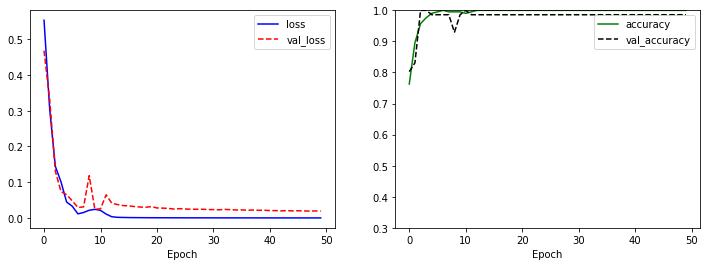

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.3, 1)
plt.legend()

plt.show()

In [12]:
model.evaluate(test_X, test_y)

3/3 [==============================] - 0s 4ms/step - loss: 1.5649 - accuracy: 0.7879


[1.564933180809021, 0.7878788113594055]

In [13]:
predict_y= model.predict(test_X)

In [14]:
a = []
for i in predict_y:
    if i >= 0.5 : 
        a.append(1)
    else :
        a.append(0)

In [15]:
con_mat = tf.math.confusion_matrix(labels=test_y, predictions=a, num_classes=2)

In [16]:
con_mat

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 1,  4],
       [10, 51]])>

In [17]:
TP = con_mat[0][0] 
FN = con_mat[0][1] 
FP = con_mat[1][0] 
TN = con_mat[1][1] 

Accuracy = (TP+TN)/(TP+FN+FP+TN)
print('Accuracy:', '{:.4f}'.format(Accuracy))
      
Recall = TP/(TP+FN) 
print('Recall:', '{:.4f}'.format(Recall))

F1_Score = 2 * (Accuracy * Recall) / (Accuracy + Recall)
print('F1_Score:', '{:.4f}'.format(F1_Score))

Accuracy: 0.7879
Recall: 0.2000
F1_Score: 0.3190
